# Credit Scoring Model

Develop a credit scoring model to predict the credit worthiness of individuals based on historical financial data.

Utilize classification algorithms and assess the model's accuracy.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-credit-scoring/bank.csv
/kaggle/input/bank-credit-scoring/scoring.jpg


# Import necessary libraries

In [2]:
# Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

# Load the Credit scoring dataset

In [3]:
df = pd.read_csv("/kaggle/input/bank-credit-scoring/bank.csv", sep=";").drop_duplicates()

# Explore the dataset

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Display descriptive statistics of numerical columns

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


Display information about the DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Preprocessing

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Display the data types of each column in the DataFrame 'df'

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Create a bar plot showing the count of each unique value in the 'marital' column of the DataFrame 'df'

<Axes: xlabel='marital', ylabel='count'>

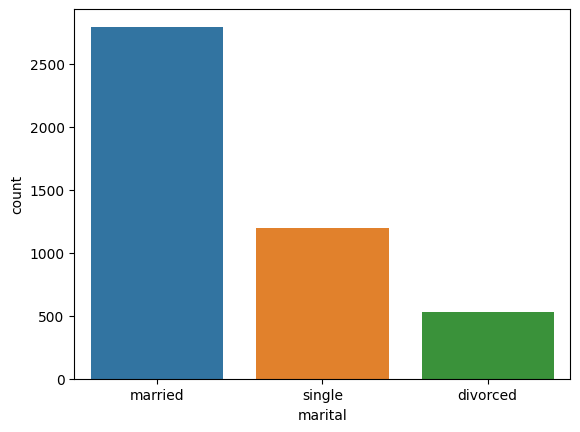

In [11]:
sns.countplot(x='marital',data=df)

Create a count plot for the 'poutcome' column in the DataFrame 'df', visualizing the frequency of each category.
sns.countplot(x='poutcome', data=df)

<Axes: xlabel='poutcome', ylabel='count'>

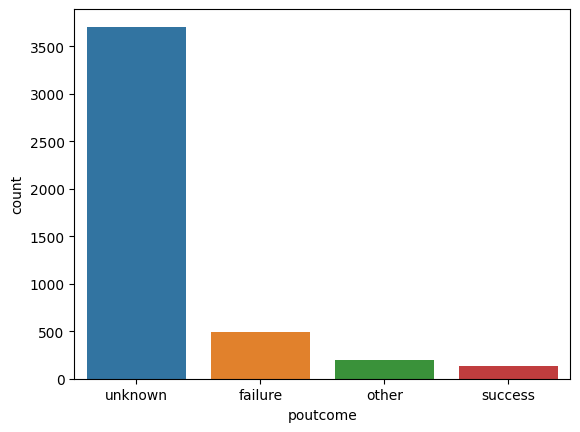

In [12]:
sns.countplot(x='poutcome',data=df)

Create a count plot for the 'housing' column using Seaborn to visualize the distribution of housing values.

<Axes: xlabel='housing', ylabel='count'>

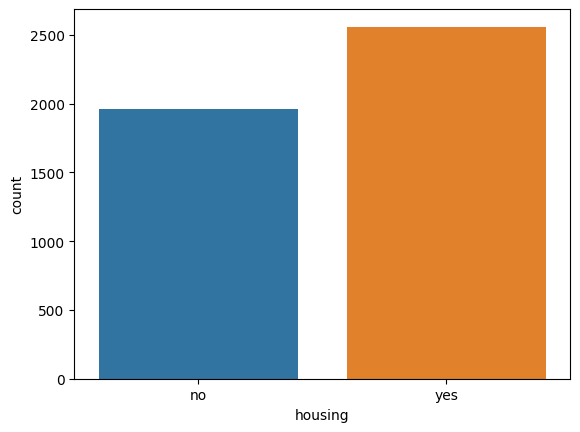

In [13]:
sns.countplot(x='housing',data=df)

# Countplot for categorical features

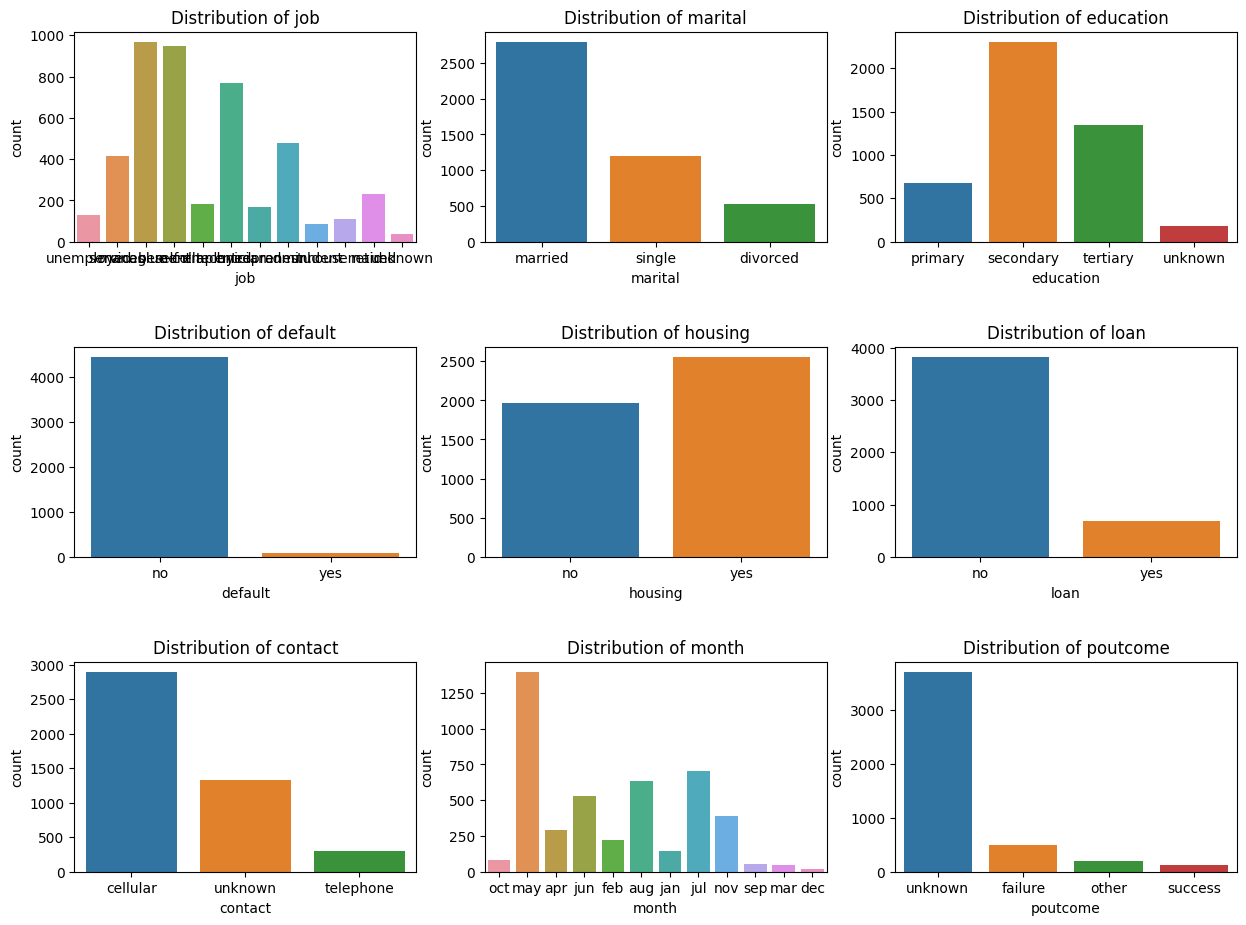

In [14]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through categorical features and create countplots
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplots
for i in range(len(categorical_features), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.show()

# Plot histograms for each categorical feature
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')


plt.show()

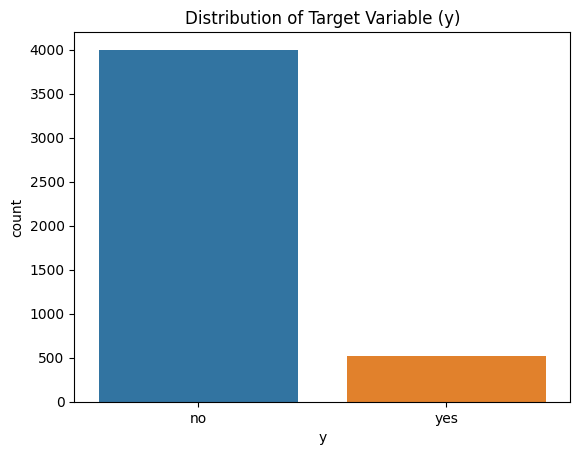

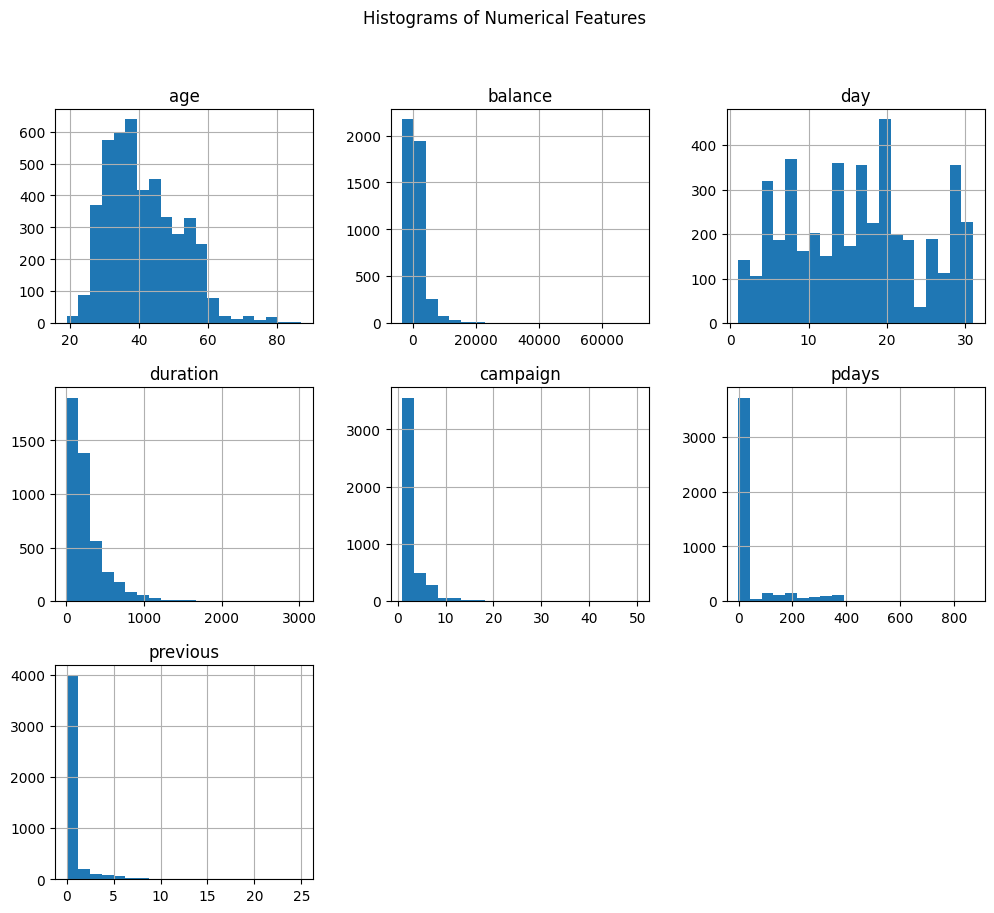

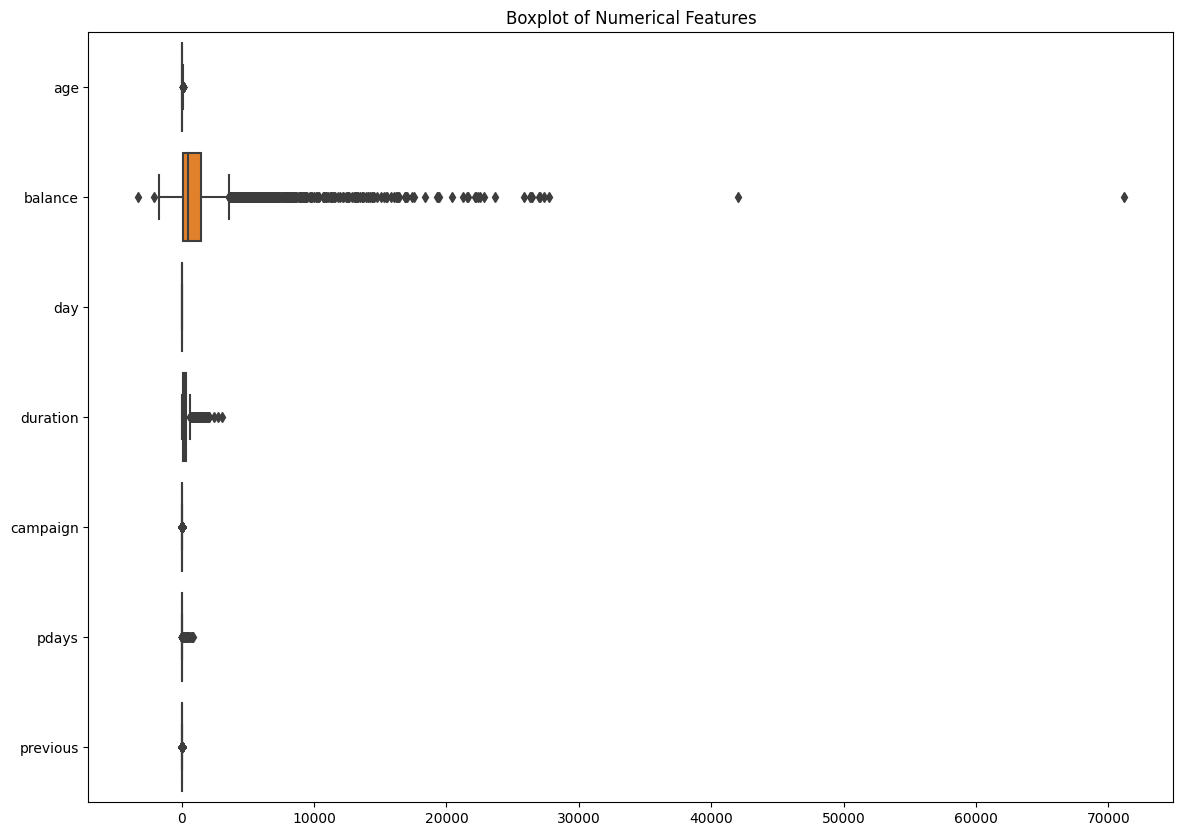

In [15]:
# Distribution of the target variable 'y'
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot of numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

Use LabelEncoder to transform categorical features in the list 'lst' to numerical values in the DataFrame 'df'

In [16]:
lst=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])

Renaming the 'y' column to 'loan_approval' in the DataFrame

In [17]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

Selecting all rows and all columns except the last one from the DataFrame 'df' and storing it in the variable 'x'

In [18]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


Extracting the last column of the DataFrame and assigning it to the variable y

In [19]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int64

Using RandomOverSampler to address class imbalance by oversampling the minority class in the dataset

In [20]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [21]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.22058824, 0.63636364, 0.5       , ..., 0.14678899, 0.12      ,
        0.66666667],
       [0.22058824, 0.09090909, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39705882, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [22]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

# MODEL IMPLIMENTATION

In [23]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       390
           1       0.82      1.00      0.90       410

    accuracy                           0.89       800
   macro avg       0.91      0.88      0.89       800
weighted avg       0.91      0.89      0.89       800



Creating and training a Support Vector Classifier with RBF kernel, C=10, and gamma=1, and making predictions on the test set.

In [24]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

Print the classification report for the predicted values (y_pred2) compared to the true values (y_test).

In [25]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       390
           1       0.87      0.94      0.90       410

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.90      0.90      0.89       800



In [26]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)

Print the classification report for evaluating the performance of a machine learning model on test data.
print(classification_report(y_test, y_pred2))

In [27]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       390
           1       0.74      0.77      0.75       410

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



Creating a Decision Tree classifier with entropy as the criterion, setting a random state for reproducibility, and limiting the maximum depth to 10. Then, fitting the model on the training data and making predictions on the test data.

In [28]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)

Print the classification report comparing the true labels (y_test) and predicted labels (y_pred3).

In [29]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       390
           1       0.84      0.93      0.88       410

    accuracy                           0.87       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



In [30]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

Print the classification report for evaluating the model's performance on the test set.

In [31]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       390
           1       0.96      1.00      0.98       410

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [32]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       390
           1       0.93      1.00      0.96       410

    accuracy                           0.96       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800



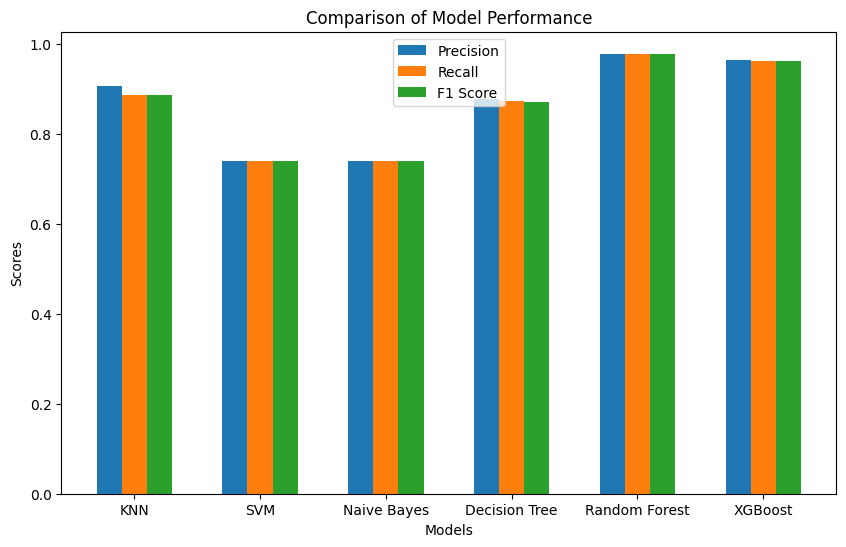

In [34]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective predictions
models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
predictions = [y_pred1, y_pred2, y_pred2, y_pred3, y_pred4, y_pred7]

# Calculate precision, recall, and f1-score for each model
precision = []
recall = []
f1_score = []

for y_pred in predictions:
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(p)
    recall.append(r)
    f1_score.append(f)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

rect1 = ax.bar(index, precision, bar_width, label='Precision')
rect2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
rect3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()

# RNN Approch

LSTM:

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

2024-02-27 15:31:20.964966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 15:31:20.965100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 15:31:21.128092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
225/225 [==============================] - 3s 5ms/step - loss: 0.6538 - accuracy: 0.6299 - val_loss: 0.6161 - val_accuracy: 0.6700
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5675 - accuracy: 0.7067 - val_loss: 0.5483 - val_accuracy: 0.7462
Epoch 3/50
225/225 [==============================] - 1s 2ms/step - loss: 0.5069 - accuracy: 0.7640 - val_loss: 0.4933 - val_accuracy: 0.7837
Epoch 4/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.7868 - val_loss: 0.4774 - val_accuracy: 0.7975
Epoch 5/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.7926 - val_loss: 0.4740 - val_accuracy: 0.8012
Epoch 6/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7946 - val_loss: 0.4787 - val_accuracy: 0.8000
Epoch 7/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7939 - val_loss: 0.4722 - val_accuracy: 0.8037
Epoch 